This code implements the Technique for Order of Preference by Similarity to Ideal Solution (TOPSIS) method for multi-criteria decision making. It starts by reading an Excel file containing the criteria values for each vendor. The data is preprocessed by removing unnecessary columns, normalizing the numeric columns using Min-Max scaling, and assigning weights to each criterion.

Next, the code calculates the ideal positive and negative solutions by multiplying the normalized data by the corresponding weights. It then computes the Euclidean distances of each vendor from both the ideal positive and negative solutions. The relative closeness to the ideal positive solution is determined by dividing the distance to the negative solution by the sum of distances to both the positive and negative solutions.

The overall scores, representing the relative closeness, are added to the data. The vendors are then ranked based on their overall scores, and the vendor names are abbreviated for readability. The ranked options, along with their abbreviated vendor names, are saved to a CSV file.

Finally, the code reads the ranked options CSV and plots a utility curve, where the x-axis represents the abbreviated vendor names, and the y-axis represents the utility scores. This curve visualizes the relative performance of each vendor based on their utility scores, providing insights for decision-making.


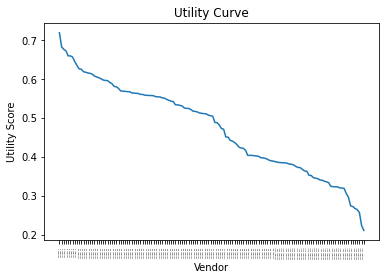

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Read the Excel file and skip the first row
data = pd.read_excel('Consolidated data.xlsx', skiprows=1)

# Remove first column
data = data.iloc[:, 1:]

# Remove the last two rows
data = data.iloc[:-2]

# Rename the columns
data.columns = ['S.no', 'Company', 'Vendor', 'IRR', 'Strategic fit', 'Technical Feasibility',
                'Uniqueness of R&D', 'Reputational risk', 'Market and Business risk',
                'Scalability', 'Regulatory risk', 'Market factors'] + data.columns[12:].tolist()

# Convert numeric columns to numeric data type
numeric_columns = ['IRR', 'Strategic fit', 'Technical Feasibility', 'Uniqueness of R&D',
                   'Reputational risk', 'Market and Business risk', 'Scalability',
                   'Regulatory risk', 'Market factors']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Apply Min-Max normalization to the numeric columns
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Define the weights for each criterion
weights = [0.1, 0.15, 0.1, 0.15, 0.05, 0.1, 0.05, 0.1, 0.2]

# Multiply the normalized data by the weights
weighted_data = data[numeric_columns] * weights

# Calculate the ideal positive and negative solutions
ideal_positive = weighted_data.max()
ideal_negative = weighted_data.min()

# Calculate the Euclidean distances to ideal positive and negative solutions
positive_distances = np.sqrt(np.sum((weighted_data - ideal_positive) ** 2, axis=1))
negative_distances = np.sqrt(np.sum((weighted_data - ideal_negative) ** 2, axis=1))

# Calculate the relative closeness to the ideal positive solution
closeness = negative_distances / (positive_distances + negative_distances)

# Add the overall scores to the data
data['overall_score'] = closeness

# Rank options based on overall scores
ranked_data = data.sort_values('overall_score', ascending=False)

# Abbreviate vendor names
abbreviated_names = [f'Vendor {i+1}' for i in range(len(ranked_data))]

# Save ranked options with abbreviated vendor names to CSV
ranked_data['Abbreviated Vendor'] = abbreviated_names
ranked_data[['S.no', 'Company', 'Abbreviated Vendor', 'overall_score']].to_csv('Ranked Options.csv', index=False)

# Read the ranked options CSV
output = pd.read_csv('Ranked Options.csv')

# Plot utility curve
plt.plot(output['Abbreviated Vendor'], output['overall_score'])
plt.xlabel('Vendor')
plt.ylabel('Utility Score')
plt.title('Utility Curve')
plt.xticks(rotation=90,fontsize=2)
plt.show()


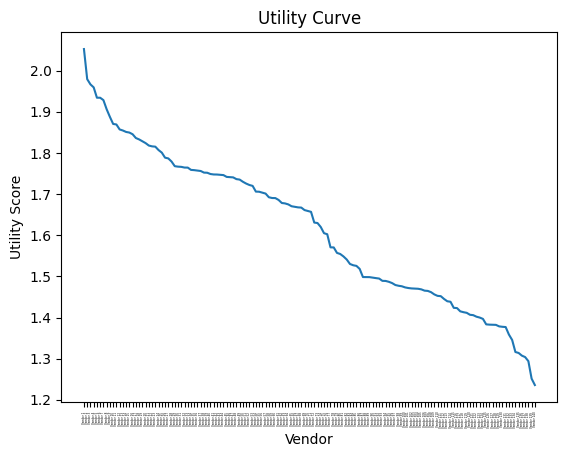

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Read the Excel file and skip the first row
data = pd.read_excel('/content/drive/MyDrive/MAUT/Consolidated data.xlsx', skiprows=1)

# Remove first column
data = data.iloc[:, 1:]

# Remove the last two rows
data = data.iloc[:-2]

# Rename the columns
data.columns = ['S.no', 'Company', 'Vendor', 'IRR', 'Strategic fit', 'Technical Feasibility',
                'Uniqueness of R&D', 'Reputational risk', 'Market and Business risk',
                'Scalability', 'Regulatory risk', 'Market factors'] + data.columns[12:].tolist()

# Convert numeric columns to numeric data type
numeric_columns = ['IRR', 'Strategic fit', 'Technical Feasibility', 'Uniqueness of R&D',
                   'Reputational risk', 'Market and Business risk', 'Scalability',
                   'Regulatory risk', 'Market factors']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Apply Min-Max normalization to the numeric columns
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Define the weights for each criterion
weights = [0.1, 0.15, 0.1, 0.15, 0.05, 0.1, 0.05, 0.1, 0.2]

# Multiply the normalized data by the weights
weighted_data = data[numeric_columns] * weights

# Calculate the ideal positive and negative solutions
ideal_positive = weighted_data.max()
ideal_negative = weighted_data.min()

# Calculate the Euclidean distances to ideal positive and negative solutions
positive_distances = np.sqrt(np.sum((weighted_data - ideal_positive) ** 2, axis=1))
negative_distances = np.sqrt(np.sum((weighted_data - ideal_negative) ** 2, axis=1))

# Calculate the relative closeness to the ideal positive solution
closeness = negative_distances / (positive_distances + negative_distances)

# Apply exponential utility function to the closeness values
a = 1  # Rate of increase in the utility function
utility_scores = np.exp(a * closeness)

# Add the overall scores to the data
data['overall_score'] = utility_scores

# Rank options based on overall scores
ranked_data = data.sort_values('overall_score', ascending=False)

# Abbreviate vendor names
abbreviated_names = ['Vendor {}'.format(i + 1) for i in range(len(ranked_data))]
ranked_data['Abbreviated Vendor'] = abbreviated_names

# Save ranked options to CSV
ranked_data[['S.no', 'Company', 'Vendor', 'Abbreviated Vendor', 'overall_score']].to_csv('/content/drive/MyDrive/MAUT/Ranked Options.csv', index=False)

# Read the ranked options CSV
output = pd.read_csv('/content/drive/MyDrive/MAUT/Ranked Options.csv')

# Plot utility curve using the utility scores
plt.plot(output['Abbreviated Vendor'], output['overall_score'])
plt.xlabel('Vendor')
plt.ylabel('Utility Score')
plt.title('Utility Curve')
plt.xticks(rotation=90, fontsize=2)
plt.show()


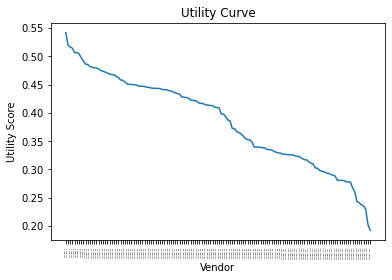

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Read the Excel file and skip the first row
data = pd.read_excel('Consolidated data.xlsx', skiprows=1)

# Remove first column
data = data.iloc[:, 1:]

# Remove the last two rows
data = data.iloc[:-2]

# Rename the columns
data.columns = ['S.no', 'Company', 'Vendor', 'IRR', 'Strategic fit', 'Technical Feasibility',
                'Uniqueness of R&D', 'Reputational risk', 'Market and Business risk',
                'Scalability', 'Regulatory risk', 'Market factors'] + data.columns[12:].tolist()

# Convert numeric columns to numeric data type
numeric_columns = ['IRR', 'Strategic fit', 'Technical Feasibility', 'Uniqueness of R&D',
                   'Reputational risk', 'Market and Business risk', 'Scalability',
                   'Regulatory risk', 'Market factors']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Apply Min-Max normalization to the numeric columns
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Define the weights for each criterion
weights = [0.1, 0.15, 0.1, 0.15, 0.05, 0.1, 0.05, 0.1, 0.2]

# Multiply the normalized data by the weights
weighted_data = data[numeric_columns] * weights

# Calculate the ideal positive and negative solutions
ideal_positive = weighted_data.max()
ideal_negative = weighted_data.min()

# Calculate the Euclidean distances to ideal positive and negative solutions
positive_distances = np.sqrt(np.sum((weighted_data - ideal_positive) ** 2, axis=1))
negative_distances = np.sqrt(np.sum((weighted_data - ideal_negative) ** 2, axis=1))

# Calculate the relative closeness to the ideal positive solution
closeness = negative_distances / (positive_distances + negative_distances)

# Apply logarithmic utility function to the closeness values
utility_scores = np.log(1 + closeness)

# Add the overall scores to the data
data['overall_score'] = utility_scores

# Rank options based on overall scores
ranked_data = data.sort_values('overall_score', ascending=False)

# Abbreviate vendor names
abbreviated_names = ['Vendor {}'.format(i + 1) for i in range(len(ranked_data))]
ranked_data['Abbreviated Vendor'] = abbreviated_names

# Save ranked options to CSV
ranked_data[['S.no', 'Company', 'Vendor', 'Abbreviated Vendor', 'overall_score']].to_csv('Ranked Options.csv', index=False)

# Read the ranked options CSV
output = pd.read_csv('Ranked Options.csv')

# Plot utility curve using the utility scores
plt.plot(output['Abbreviated Vendor'], output['overall_score'])
plt.xlabel('Vendor')
plt.ylabel('Utility Score')
plt.title('Utility Curve')
plt.xticks(rotation=90, fontsize=2)
plt.show()
